# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

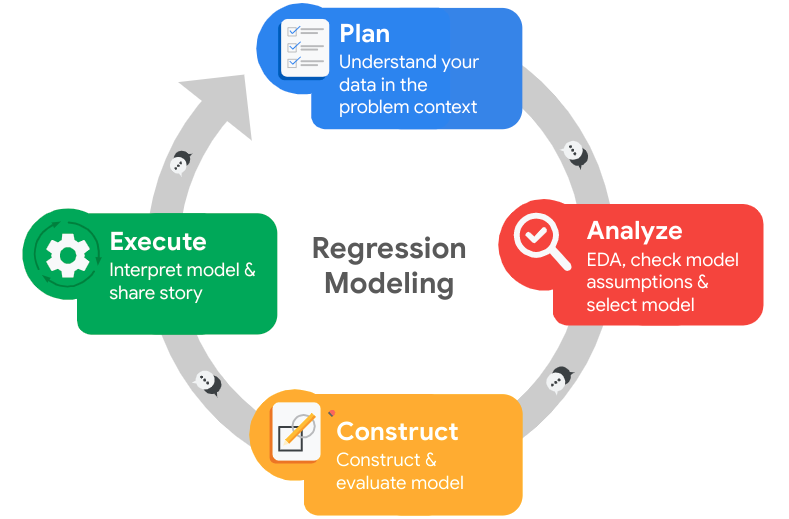



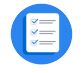

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
# Rename columns as needed
### YOUR CODE HERE ###
df.rename(columns= {'number_project': 'number_of_projects', 'average_montly_hours': 'avg_monthly_hours',
                     'time_spend_company': 'years_at_company', 'Work_accident': 'work_accident', 'left': 'churned',
                     'promotion_last_5years': 'promotion', 'Department': 'department'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'avg_monthly_hours', 'years_at_company', 'work_accident', 'churned',
       'promotion', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df.isna().sum()

satisfaction_level    0
last_evaluation       0
number_of_projects    0
avg_monthly_hours     0
years_at_company      0
work_accident         0
churned               0
promotion             0
department            0
salary                0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df.tail()

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,years_at_company,work_accident,churned,promotion,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df.drop_duplicates(inplace=True)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,years_at_company,work_accident,churned,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

<AxesSubplot:xlabel='years_at_company'>

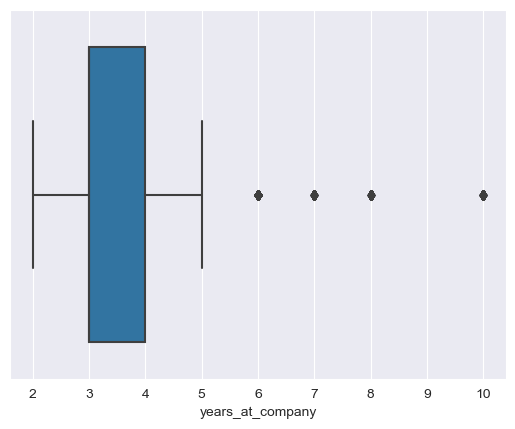

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(data=df, x='years_at_company')

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
percentile25 = df['years_at_company'].quantile(0.25)
percentile75 = df['years_at_company'].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

outs = df.loc[df['years_at_company'] > upper_limit, 'years_at_company']
print(len(outs))
print(outs.unique())

824
[ 6  8 10  7]


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

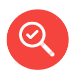
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




There were a few interesting observations I came across in the data. Firstly, most employees (50%) had an average satisfaction level, and pretty much fell average on every other metric as well. The variable that stood out most to me was the number of hours being worked by the employees. The average number of hours being worked by employees was around 201 hours for the month, that is around 40 more hours than the average 40hr work week. In fact only about 25% of employees were working around 40hr a week per month. Even more interesting was the max number of hours being worked at 310 hours for the month, almost double than the average work week of 40hrs. Another variable that stood out to me was the number of projects that an employee was contributing to. The average being around 4 projects per employee, but the max number of projects that an employee took on was 7 which seems high. These two features could be a key to finding the churn rate of an employee.

One question I had looking at the data was the number of duplicates that showed. I believe the duplicates found are not actually duplicated and just employees with similar responses and work descriptions. Looking to outliers I found there were around 1300 employees that had a longer tenure at the company than most. These employees look to have been around from 6-10 years. It may be interesting to take a look at these employees responses and see if we can find insights as to the reasons they have stayed longer than the others.

## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,years_at_company,work_accident,churned,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Employees by Salary

<AxesSubplot:xlabel='salary', ylabel='satisfaction_level'>

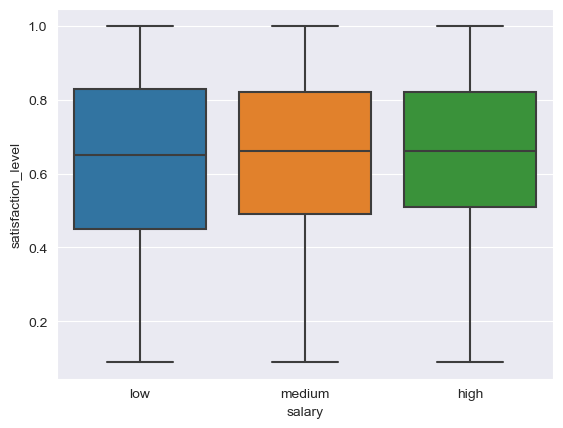

In [14]:
sns.boxplot(data=df, x='salary', y='satisfaction_level')

As salary increases from low to high, we can observe that employees satisfaction level range tightens meaning their satisfaction level does not vary as much as the previous. Employees who have the highest salary seem to be more satisfied, though the lower limits and higher limits are similar to the other salaries.

<AxesSubplot:xlabel='salary', ylabel='years_at_company'>

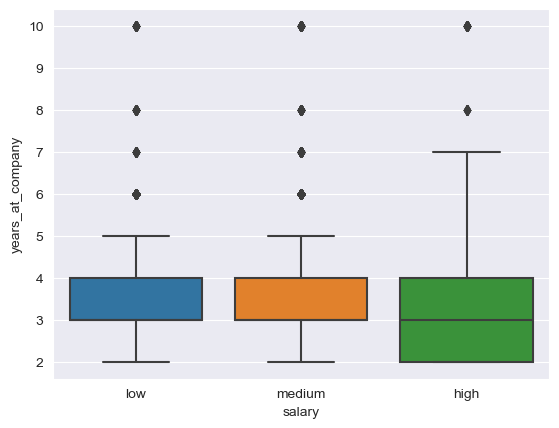

In [15]:
sns.boxplot(data=df, x='salary', y='years_at_company')

This observation is very interesting. Looking at the outliers there does not seem to be a salary that dictates how long an employees stays with the company. As for employees who make low and medium salaries, their stay at the company seems to be similar. Employees who make the highest salaries however have a wider spread of tenure, with a higher limit of around 7 years while employees with medium and low salaries upper limit is at 5 years.

<AxesSubplot:xlabel='salary', ylabel='avg_monthly_hours'>

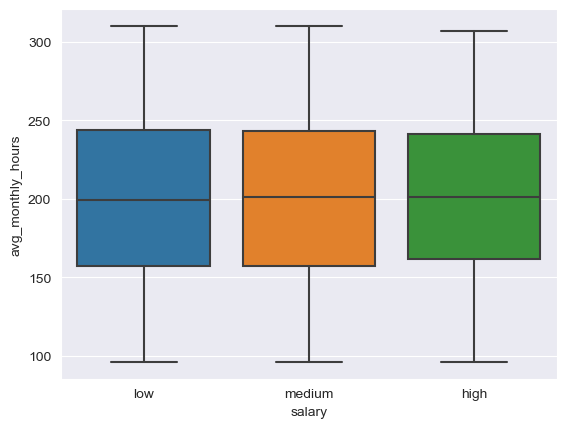

In [16]:
sns.boxplot(data=df, x='salary', y='avg_monthly_hours')

Employees of all salaries seem to work similar hours. Employees who have highest salaries work slightly less hours, barely noticable.

## Employees by Department

<AxesSubplot:xlabel='department', ylabel='satisfaction_level'>

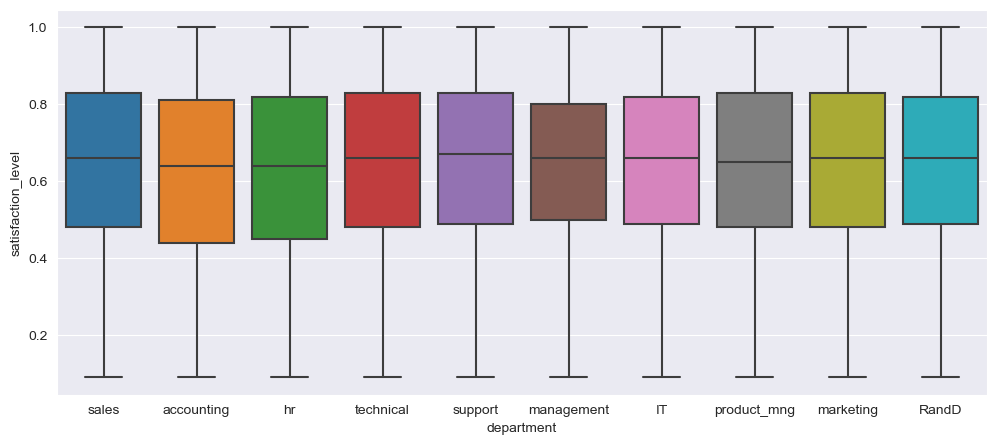

In [17]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(data=df, x='department', y='satisfaction_level', ax=ax)

All department look to have a similar satisfaction level. Accounting and HR can be observed as having the lowest Q1 out of the rest. Management looks to have the tighest spread of satisfaction out of all the departments.

<AxesSubplot:xlabel='department', ylabel='years_at_company'>

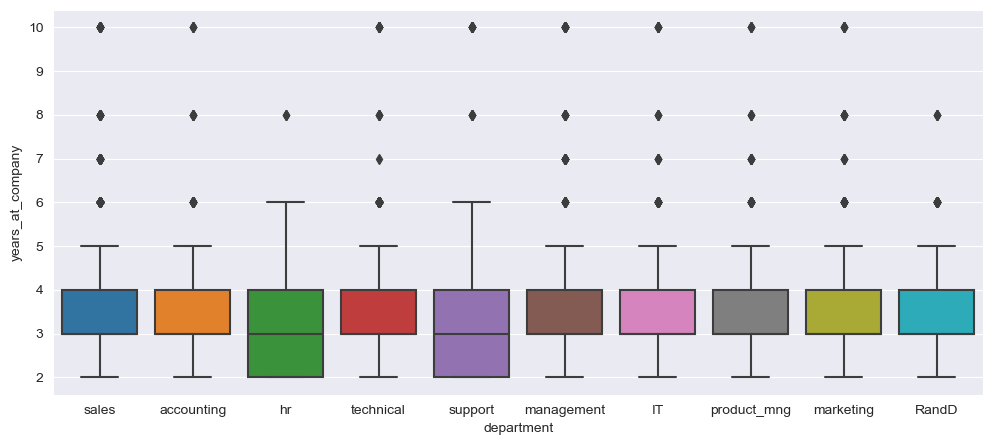

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(data=df, x='department', y='years_at_company', ax=ax)

Taking a look at how long an employee tenure is by department we can see there is a pretty similar distribution. We can note that HR and the R&D department are the only departments that do no have outliers reaching over 8 years. Looking at the HR department they have the biggest spread along with the Support department ranging from 2-4 years instead of 3-4 years like the rest of the departments. This means that the HR and Support Department have more employees leaving the company sooner than any other department.

<AxesSubplot:xlabel='department', ylabel='avg_monthly_hours'>

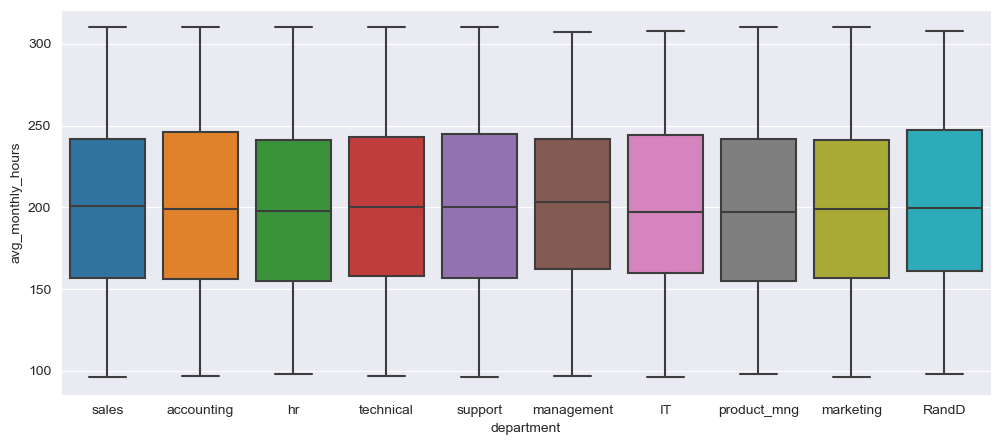

In [19]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(data=df, x='department', y='avg_monthly_hours', ax=ax)

We don't see any significant observations of Department by working hours. Looking at HR and Support there are no signs that correlate to employees leaving the company early because of working hours or lack there of.

## Feature Distributions

In [20]:
df.head()

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,years_at_company,work_accident,churned,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<AxesSubplot:>

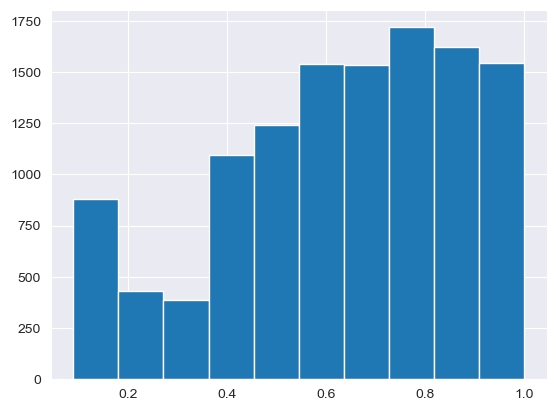

In [21]:
df['satisfaction_level'].hist()

Looking at the distribution of the overall satisfaction level of employees, they seem to be very satisfied. There is a noticeable number of unsatisfied employees.

<AxesSubplot:>

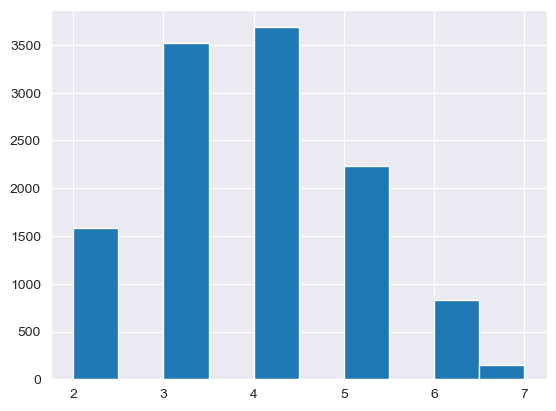

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
df['number_of_projects'].hist()

The number of projects seem to be normally distributed. Most employees look to take on around 4 projects.

<AxesSubplot:>

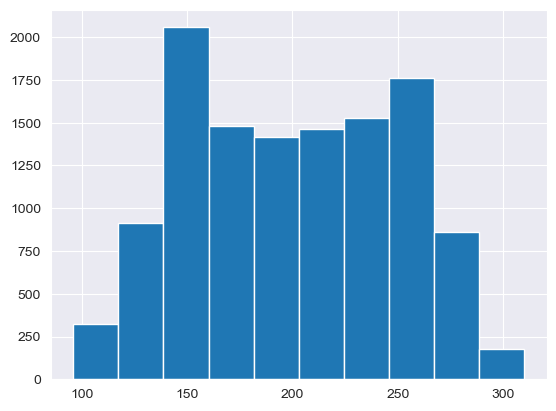

In [23]:
df['avg_monthly_hours'].hist()

The distribution of the number of hours an employee works monthly shows that there are a lot of employees that work an average work week of 40 hours. We can also observe there is a significant amount of employees who work more than that. This might be an interesting feature to look into.

<AxesSubplot:>

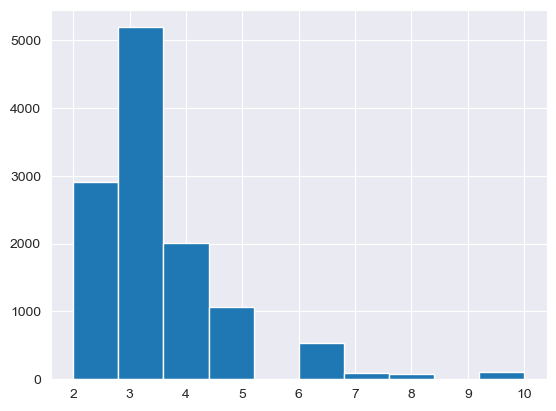

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
df['years_at_company'].hist()

Most employees are leaving right around 3 years after being with the company.

[Text(0, 0, '11788'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '203')]

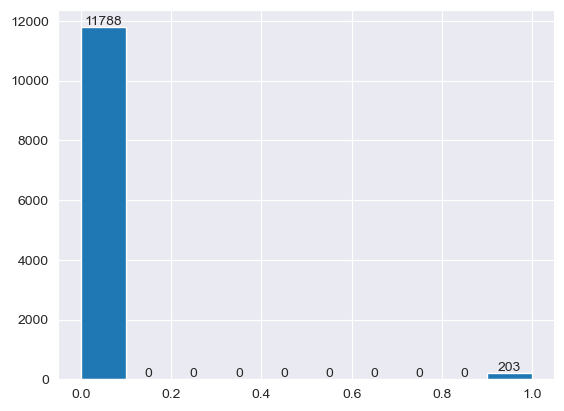

In [25]:
counts, edges, bars = plt.hist(df['promotion'])
plt.bar_label(bars)

This is very intriguing, there a very few promotions among the employees. A significant amount of employees are not getting promoted. Only 203 out of 14999 employees have been promoted.

[Text(0, 0, '10141'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1850')]

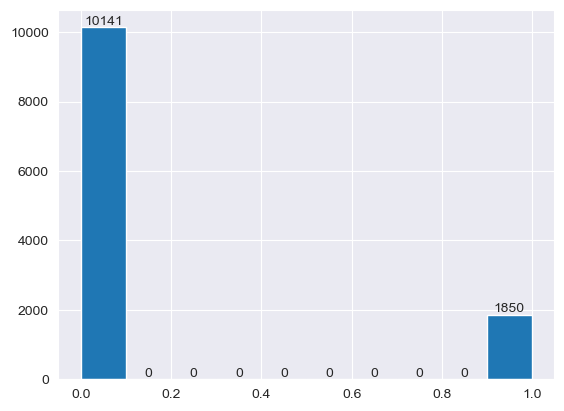

In [26]:
counts, edges, bars = plt.hist(df['work_accident'])
plt.bar_label(bars)

## Hours of Work Comparison

I want to take a look at the employees who are working more than an average 40 hour work week, that would be 160 hours in a month. I would like to compare these employees who work the average 40 hour work week and less. This will later be a feature I will add to the dataframe.

### Seperate Data Into Subdata

In [27]:
# more than 40 hours a week > 160 hours a month
# less than 40 hours a week is <= 160 hours a month

more_than_forty = df[df['avg_monthly_hours'] > 160]
less_than_forty = df[df['avg_monthly_hours'] <= 160]

In [28]:
# balance of employees who work less than 40 hours a week compared to those who do
# 1 for employees who DO work more than 40 hours a week and 0 for employees who DO NOT.

balance = np.where(df['avg_monthly_hours'] > 160, 1, 0)
balance = pd.Series(balance)
balance.value_counts(normalize=True)

1    0.725211
0    0.274789
dtype: float64

From the data it looks like 73% of employees work more than 40 hours a week while about 27% of employees do not. Obviously there is going to be positions that are part-time. But this may be a reason for an employee leaving.

<AxesSubplot:xlabel='avg_monthly_hours'>

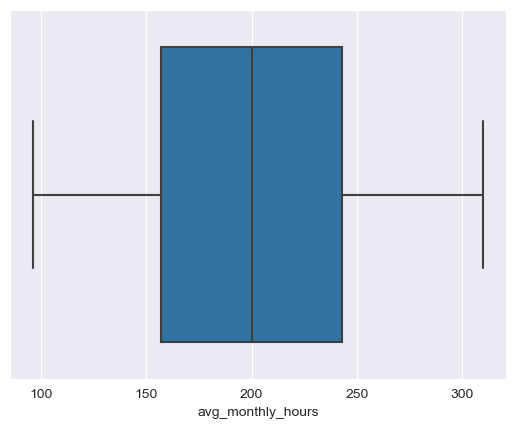

In [29]:
sns.boxplot(data=df, x='avg_monthly_hours')

The median of the average monthly hours worked by employees is 200 hours which is more than 40 hours a week. The IQR ranges from  ~ 160 hours to 240 hours.

## Comparing Work Hour Distributions

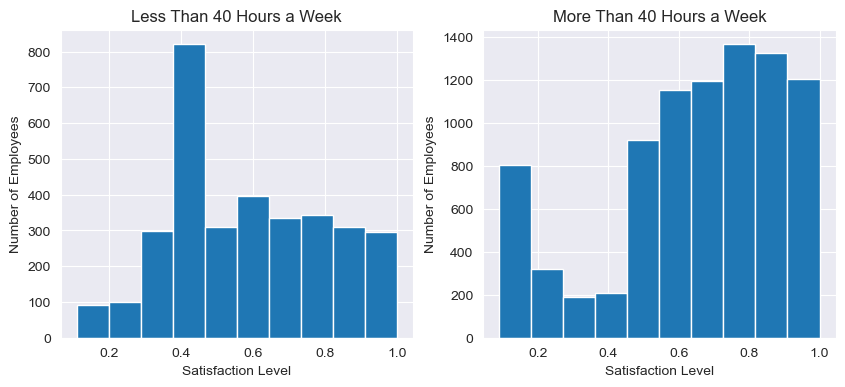

In [30]:
fig, axes = plt.subplots(1, 2, figsize= (10, 4))

less_than_forty['satisfaction_level'].hist(ax=axes[0])
axes[0].set_xlabel('Satisfaction Level')
axes[0].set_ylabel('Number of Employees')
axes[0].set_title('Less Than 40 Hours a Week')

more_than_forty['satisfaction_level'].hist(ax=axes[1])
axes[1].set_xlabel('Satisfaction Level')
axes[1].set_ylabel('Number of Employees')
axes[1].set_title('More Than 40 Hours a Week')

plt.show()

Comparing employees who work less than 40 hours on average a week to those who work more seem to be less satisfied.

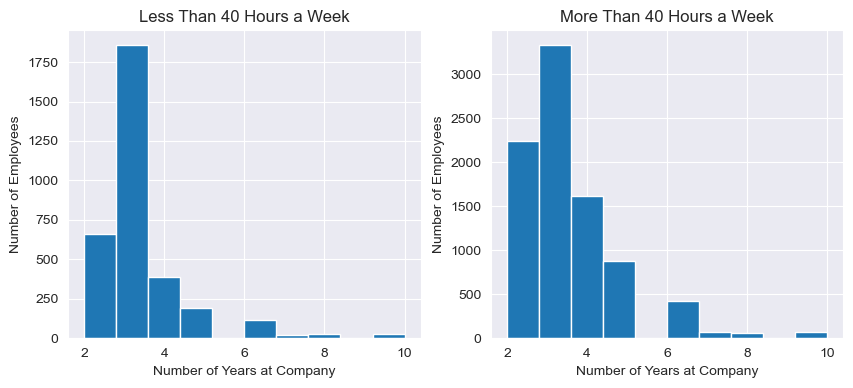

In [31]:
fig, axes = plt.subplots(1, 2, figsize= (10, 4))

less_than_forty['years_at_company'].hist(ax=axes[0])
axes[0].set_xlabel('Number of Years at Company')
axes[0].set_ylabel('Number of Employees')
axes[0].set_title('Less Than 40 Hours a Week')

more_than_forty['years_at_company'].hist(ax=axes[1])
axes[1].set_xlabel('Number of Years at Company')
axes[1].set_ylabel('Number of Employees')
axes[1].set_title('More Than 40 Hours a Week')

plt.show()

It is not significant, but it is noticeable that the employees who work less than 40 are also less prone to stay longer than 3 years.

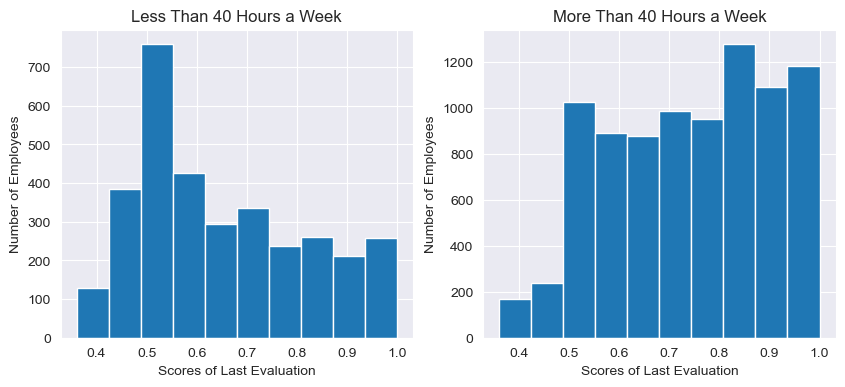

In [32]:
fig, axes = plt.subplots(1, 2, figsize= (10, 4))

less_than_forty['last_evaluation'].hist(ax=axes[0])
axes[0].set_xlabel('Scores of Last Evaluation')
axes[0].set_ylabel('Number of Employees')
axes[0].set_title('Less Than 40 Hours a Week')

more_than_forty['last_evaluation'].hist(ax=axes[1])
axes[1].set_xlabel('Scores of Last Evaluation')
axes[1].set_ylabel('Number of Employees')
axes[1].set_title('More Than 40 Hours a Week')

plt.show()

The scores of employees last evaluation who work less than 40 hours a week are significantly lower and have a negative linear correlation. Employees who work more than 40 hours a week have a positive linear correlation, meaning as the number of employees who work increase so do their evaluations scores.

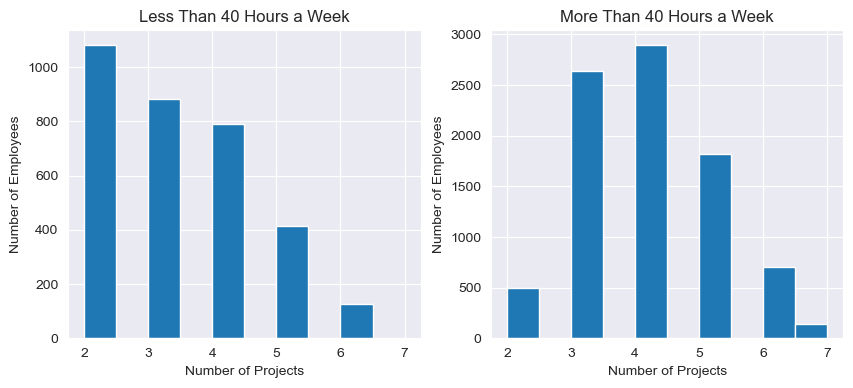

In [33]:
fig, axes = plt.subplots(1, 2, figsize= (10, 4))

less_than_forty['number_of_projects'].hist(ax=axes[0])
axes[0].set_xlabel('Number of Projects')
axes[0].set_ylabel('Number of Employees')
axes[0].set_title('Less Than 40 Hours a Week')

more_than_forty['number_of_projects'].hist(ax=axes[1])
axes[1].set_xlabel('Number of Projects')
axes[1].set_ylabel('Number of Employees')
axes[1].set_title('More Than 40 Hours a Week')

plt.show()

The number of projects that employees who work more than 40 hours a week contribute on have a normal distribution which is a similar distribution for the entire dataset. The number of projects that employees who work more than 40 hours a week contribute to have an inverse relationship. This shows that employees who work 40 hours a week OR LESS work on less projects, this could be due to new employees or some other variable.

**Another reason for this is simply cause and effect. The more projects that an employee takes on the more hours they are going to work. **

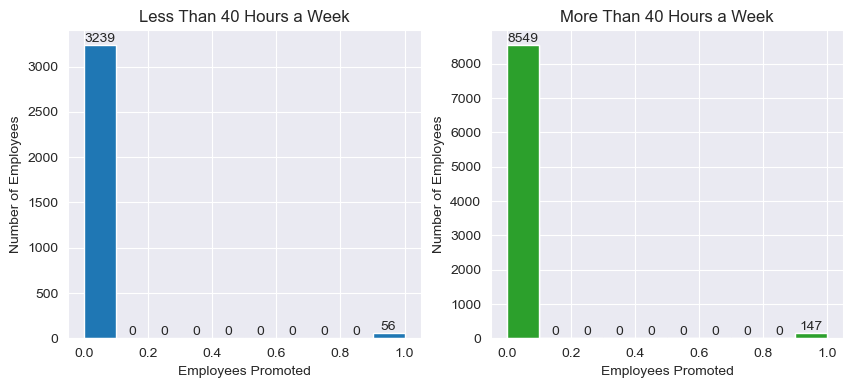

In [34]:
fig, axes = plt.subplots(1, 2, figsize= (10, 4))

counts, edges, bars0 = plt.hist(less_than_forty['promotion'])
less_than_forty['promotion'].hist(ax=axes[0])
axes[0].set_xlabel('Employees Promoted')
axes[0].set_ylabel('Number of Employees')
axes[0].set_title('Less Than 40 Hours a Week')
axes[0].bar_label(bars0)

counts, edges, bars1 = plt.hist(more_than_forty['promotion'])
more_than_forty['promotion'].hist(ax=axes[1])
axes[1].set_xlabel('Employees Promoted')
axes[1].set_ylabel('Number of Employees')
axes[1].set_title('More Than 40 Hours a Week')
axes[1].bar_label(bars1)

plt.show()

The distribution between the two groups of employees shows that both groups have a very low amount of promotions, with employees who work more than 40 hours a week having almost 3 times more promotions. This may also be a key
indicator as to why employees leave.

### Churn Rate Comparison

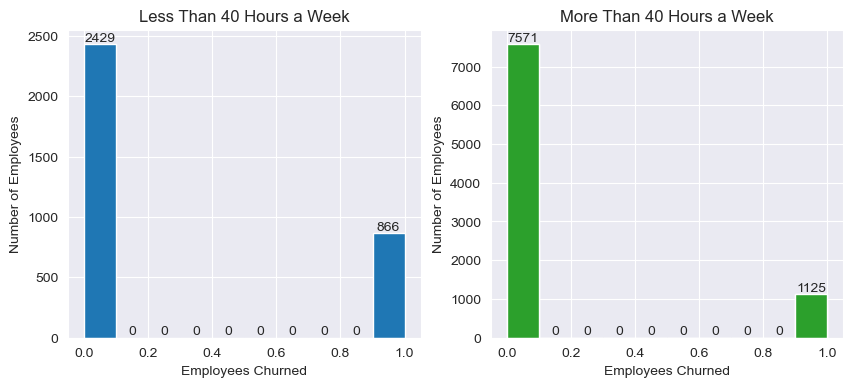

In [35]:
fig, axes = plt.subplots(1, 2, figsize= (10, 4))

counts, edges, bars0 = plt.hist(less_than_forty['churned'])
less_than_forty['churned'].hist(ax=axes[0])
axes[0].set_xlabel('Employees Churned')
axes[0].set_ylabel('Number of Employees')
axes[0].set_title('Less Than 40 Hours a Week')
axes[0].bar_label(bars0)

counts, edges, bars1 = plt.hist(more_than_forty['churned'])
more_than_forty['churned'].hist(ax=axes[1])
axes[1].set_xlabel('Employees Churned')
axes[1].set_ylabel('Number of Employees')
axes[1].set_title('More Than 40 Hours a Week')
axes[1].bar_label(bars1)

plt.show()

The distributions between the two groups looking at the churn rate show that those who work 40 hours a week or less have the higher rate at almost 36%, while the employees who work more than 40 hours a week have a churn rate of about 15%.

## Pivot Tabels Comparing Key Indicators

In [36]:
pd.pivot_table(df, index= 'department', values=['avg_monthly_hours', 'last_evaluation', 'number_of_projects', 'satisfaction_level', 'years_at_company']).sort_values(by='avg_monthly_hours',ascending=False)

,avg_monthly_hours,last_evaluation,number_of_projects,satisfaction_level,years_at_company
department,,,,,
management,201.529817,0.726307,3.837156,0.631995,3.981651
RandD,201.291066,0.712983,3.850144,0.627176,3.319885
technical,201.115419,0.719791,3.859180,0.627937,3.309269
accounting,200.877617,0.721900,3.834138,0.607939,3.404187
IT,200.638320,0.715051,3.797131,0.634016,3.350410
support,200.627128,0.722998,3.820977,0.634822,3.292696
sales,200.242050,0.710398,3.777092,0.631349,3.380673
marketing,199.487370,0.718440,3.720654,0.634770,3.421991
hr,199.371048,0.715691,3.675541,0.621947,3.256240


In [37]:
pd.pivot_table(df, index= 'salary', values=['avg_monthly_hours', 'last_evaluation', 'number_of_projects', 'satisfaction_level', 'years_at_company']).sort_values(by='avg_monthly_hours', ascending=False)

,avg_monthly_hours,last_evaluation,number_of_projects,satisfaction_level,years_at_company
salary,,,,,
medium,200.587341,0.716539,3.806121,0.634723,3.389850
low,200.439199,0.718512,3.801742,0.622655,3.319686
high,200.067677,0.706838,3.791919,0.643343,3.493939


In [38]:
pd.pivot_table(df, index= ['years_at_company', 'number_of_projects'], values=['last_evaluation', 'satisfaction_level', 'avg_monthly_hours'])

avg_monthly_hours  last_evaluation  \
years_at_company number_of_projects                                       
2                2                          188.405000         0.660650   
                 3                          197.668138         0.715958   
                 4                          202.522080         0.729588   
                 5                          204.874251         0.725329   
                 6                          192.125000         0.691429   
                 7                          156.000000         0.470000   
3                2                          155.257750         0.550655   
                 3                          196.881420         0.717026   
                 4                          201.705031         0.726258   
                 5                          205.216883         0.728532   
                 6                          194.462810         0.675785   
                 7                          233.000000         0.586667   
4                2                          190.042017         0.698739   
                 3                          198.298947         0.731011   
                 4                          202.554672         0.715308   
                 5                          201.323529         0.733556   
                 6                          254.579710         0.826256   
                 7                          279.983333         0.882333   
5                2                          185.712121         0.687273   
                 3                          193.888889         0.713419   
                 4                          220.769939         0.813037   
                 5                          226.651948         0.835221   
                 6                          218.068027         0.737551   
                 7                          262.476190         0.814286   
6                2                          192.040816         0.628367   
                 3                          199.855856         0.694775   
                 4                          209.396104         0.776558   
                 5                          216.083333         0.782821   
                 6                          214.291667         0.687917   
7                2                          194.375000         0.575000   
                 3                          195.827586         0.667931   
                 4                          200.500000         0.704375   
                 5                          208.000000         0.698421   
                 6                          211.333333         0.733333   
8                2                          162.500000         0.610000   
                 3                          203.032258         0.704516   
                 4                          177.304348         0.745652   
                 5                          213.470588         0.684118   
                 6                          180.500000         0.847500   
10               2                          190.800000         0.704000   
                 3                          194.787234         0.730638   
                 4                          199.789474         0.754211   
                 5                          224.727273         0.692727   
                 6                          190.666667         0.688333   

                                     satisfaction_level  
years_at_company number_of_projects                      
2                2                             0.604800  
                 3                             0.703760  
                 4                             0.714230  
                 5                             0.715329  
                 6                             0.525179  
                 7                             0.660000  
3                2                             0.458361  
                 3                             0.708554  
      

Taking a look at the years and number of projects an employees contributes to, there is in interested correlation. Noticeable is the satisfaction level and evaluation scores is the highest on average no matter how long an employees has been with the company when the employee is contributing to 4-5 projects, more projects than that both satisfaction and evaluation score drop, satisfaction more so. However, in certain cases, such as employees who have been at the company for 4-6 years their evaluation score normally increase but their satisfaction again decreases. It is also observed that employees who have been with the company 3-5 years have the lowest satisfaction levels, taking on 6-7 projects, of .1.-2.

<AxesSubplot:xlabel='number_of_projects', ylabel='satisfaction_level'>

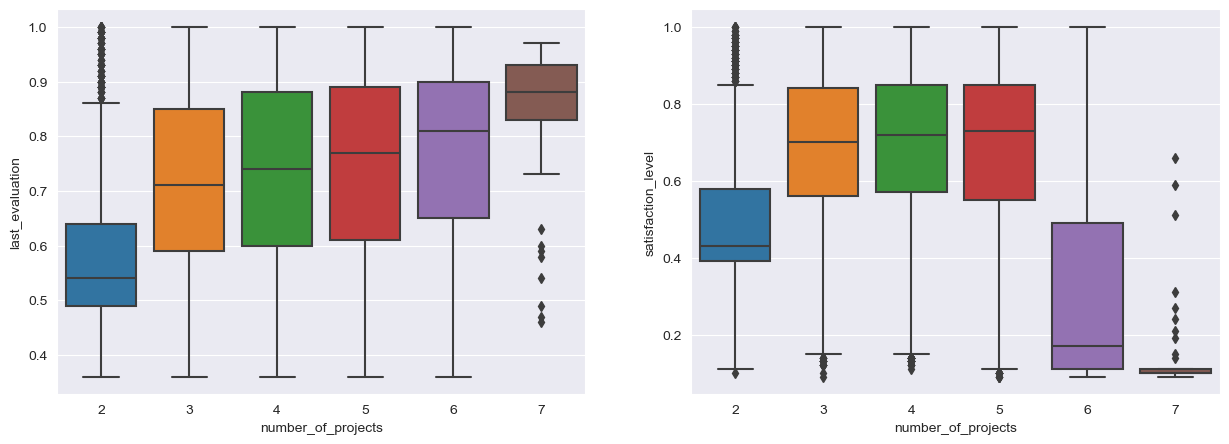

In [39]:
fig, axes = plt.subplots(1, 2, figsize= (15, 5))
sns.boxplot(data=df, x='number_of_projects', y='last_evaluation', ax=axes[0])
sns.boxplot(data=df, x='number_of_projects', y='satisfaction_level', ax=axes[1])

Here we can see better the relationships described above.

In [40]:
hour_diff = df.copy()
hour_diff['more_than_forty'] = np.where(df['avg_monthly_hours'] > 160, 1, 0)
pd.pivot_table(hour_diff, index=['more_than_forty'], values=['last_evaluation', 'number_of_projects', 'satisfaction_level', 'years_at_company'])

,last_evaluation,number_of_projects,satisfaction_level,years_at_company
more_than_forty,,,,
0,0.650331,3.278907,0.586000,3.267678
1,0.741824,4.001380,0.646201,3.401679


Taking a quick look at employees who work more than forty hours a week compared to those who work more, again it is interesting to see that those who work more score higher on their evaluations and have a higher satisfaction level.

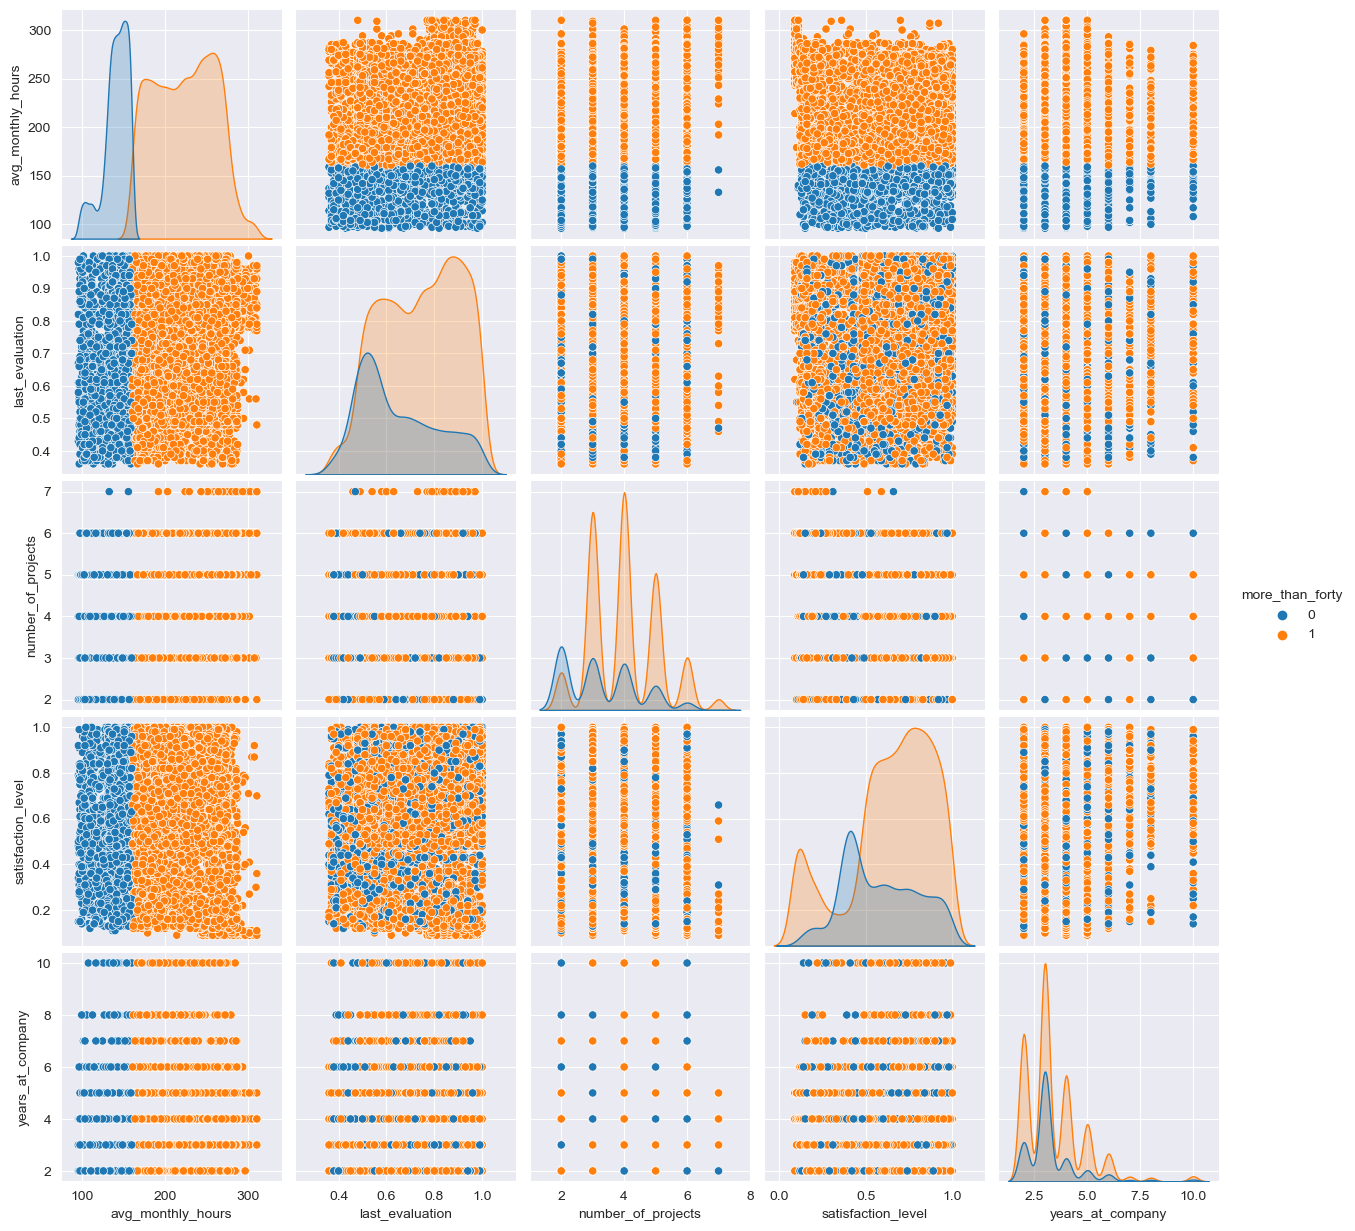

In [103]:
df_pair = hour_diff[['avg_monthly_hours', 'last_evaluation', 'number_of_projects', 'satisfaction_level', 'years_at_company', 'more_than_forty']]
sns.pairplot(df_pair, hue='more_than_forty')

Not much can be gathered from this pair wise plot. This seperation shows there is significantly more employees who work more than 40 hours a week.

## Employees That Left vs Employees That Stayed

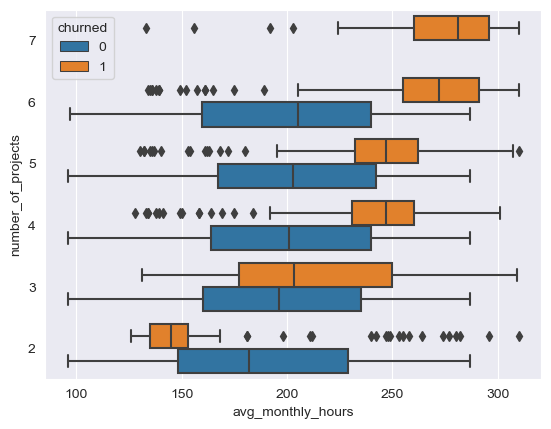

In [112]:
fig = sns.boxplot(data=df, x='avg_monthly_hours', y='number_of_projects', hue='churned', orient='h')
fig.invert_yaxis()
plt.show()

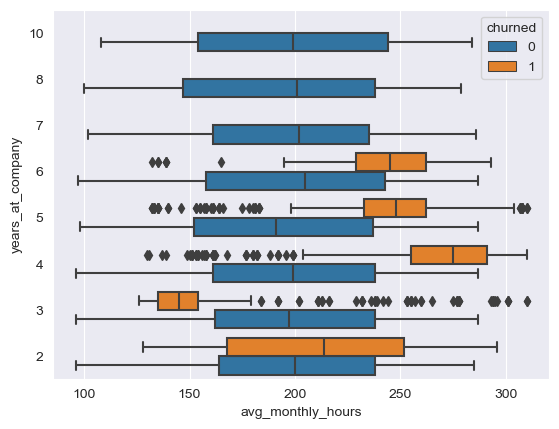

In [17]:
fig = sns.boxplot(data=df, x='avg_monthly_hours', y='years_at_company', hue='churned', orient='h')
fig.invert_yaxis()
plt.show()

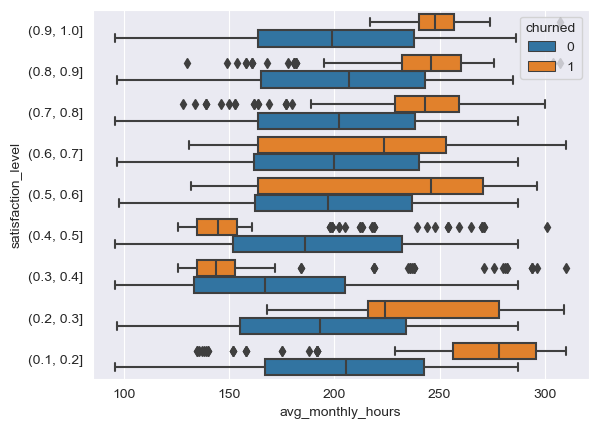

In [21]:
bins = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
sat_level_binned = pd.cut(df['satisfaction_level'],bins)
fig = sns.boxplot(data=df, x='avg_monthly_hours', y=sat_level_binned, hue='churned', orient='h')
fig.invert_yaxis()
plt.show()

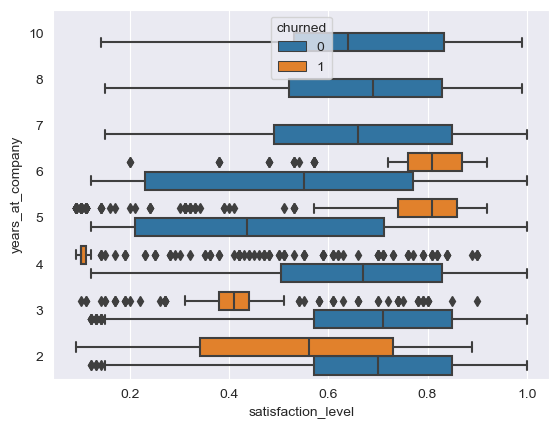

In [20]:
fig = sns.boxplot(data=df, x='satisfaction_level', y='years_at_company', hue='churned', orient='h')
fig.invert_yaxis()
plt.show()

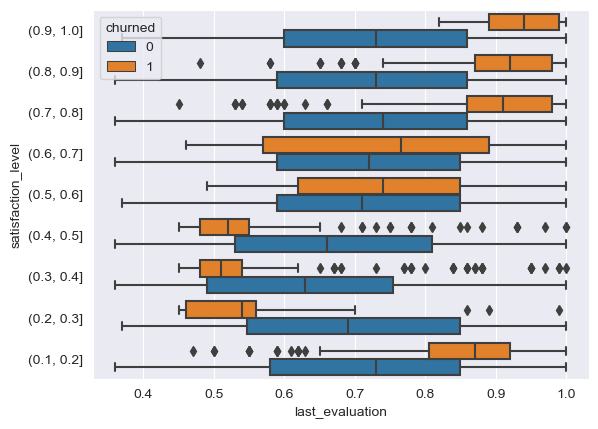

In [23]:
fig = sns.boxplot(data=df, x='last_evaluation', y=sat_level_binned, hue='churned', orient='h')
fig.invert_yaxis()
plt.show()

## Feature Engineering

Features to engineer:
* 40 hour work week split

We know from earlier analysis that employees who work less than 40 hours a week are less satisfied and those who work more than 40 hours a week are generally more satisfied and do better all around on all metrics.

In [42]:
df.head()

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,years_at_company,work_accident,churned,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [43]:
df['less_than_forty'] = np.where(df['avg_monthly_hours'] <= 160, 1, 0)
df.head()

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,years_at_company,work_accident,churned,promotion,department,salary,less_than_forty
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


## Variable Encoding
Encode categorical variables so we can take a look at a heatmap correlation and prep for model construction.

In [44]:
df_dum = pd.get_dummies(df)
df_dum.head()

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,years_at_company,work_accident,churned,promotion,less_than_forty,department_IT,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [45]:
df_dum.corr()

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,years_at_company,work_accident,churned,promotion,less_than_forty,department_IT,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,-0.111483,0.005382,...,-0.007348,0.001883,0.005171,0.000171,0.004268,0.009064,-0.003426,0.017031,-0.027838,0.018579
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,-0.242630,-0.002885,...,-0.001354,0.011106,0.002546,-0.004233,-0.022711,0.015876,0.008859,-0.017543,0.010416,-0.000755
number_of_projects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,-0.277270,-0.001464,...,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235,-0.002820,-0.000914,0.002484
avg_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,-0.757146,0.001007,...,-0.005197,0.004211,-0.004935,-0.007987,-0.002890,0.001334,0.006321,-0.002499,-0.000675,0.002065
years_at_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.044970,-0.003233,...,-0.018757,0.090071,0.010474,-0.004398,0.007233,-0.022955,-0.020051,0.029111,-0.032541,0.016612
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.010013,-0.009777,...,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268,0.002735,0.001580,-0.003108
churned,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.160095,-0.003324,...,0.013567,-0.024417,0.000248,-0.003768,0.006154,0.006019,0.010000,-0.094769,0.099113,-0.047214
promotion,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.000315,-0.034334,...,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502,0.063982,-0.076576,0.041601
less_than_forty,-0.111483,-0.242630,-0.277270,-0.757146,-0.044970,-0.010013,0.160095,0.000315,1.000000,-0.013797,...,0.011860,-0.017773,0.003301,0.014072,0.007976,0.002399,-0.006048,-0.023107,0.010736,0.002008
department_IT,0.005382,-0.002885,-0.001464,0.001007,-0.003233,-0.009777,-0.003324,-0.034334,-0.013797,1.000000,...,-0.068377,-0.057822,-0.072586,-0.073326,-0.181086,-0.125958,-0.142826,-0.010617,0.005370,0.000482


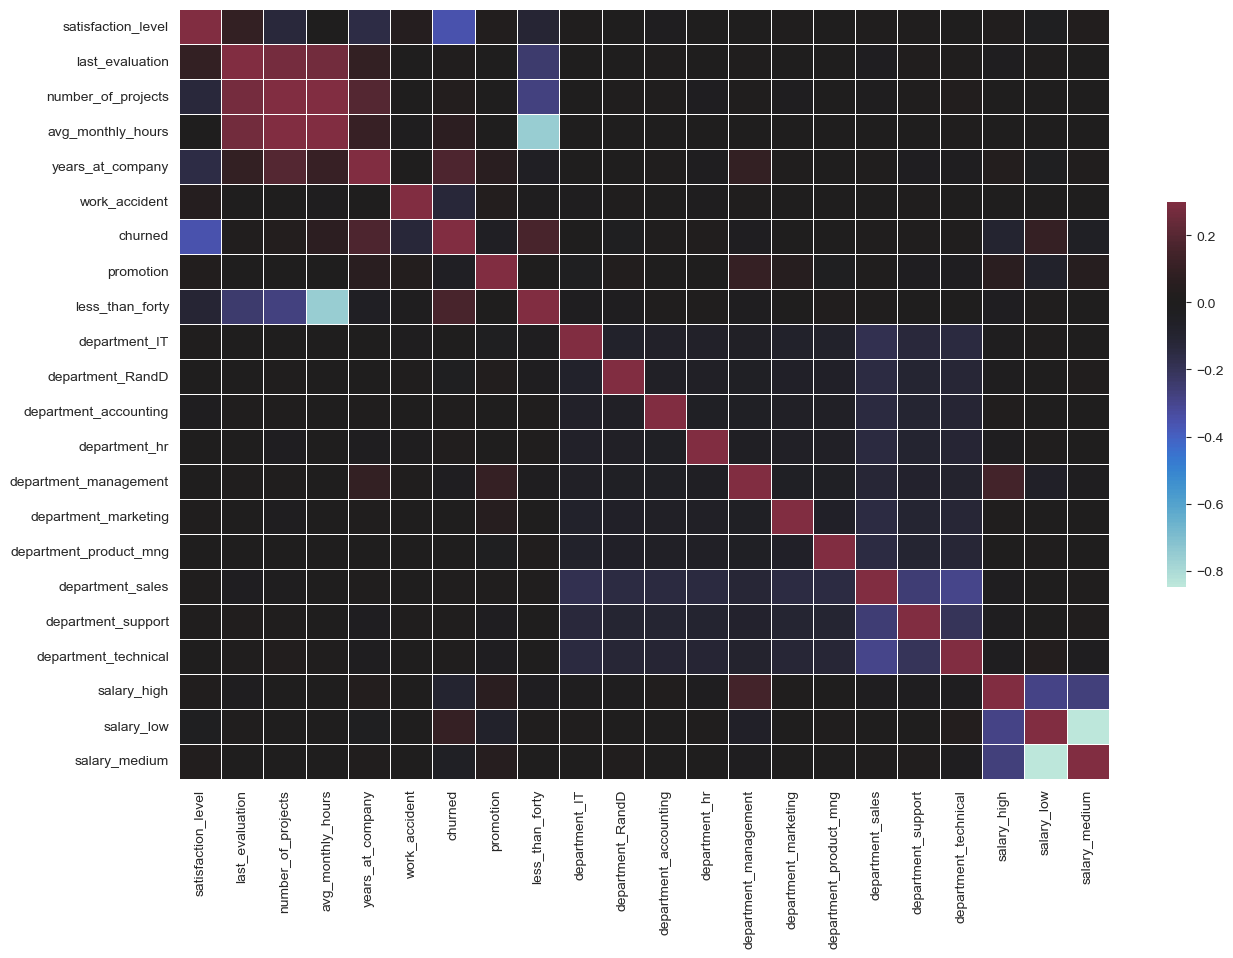

In [46]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_dum.corr(method='pearson'), vmax=.3, center=0, cmap='icefire', linewidths=.5, cbar_kws={'shrink': 0.5})

Examining the heatmap we can validate some clear correlations that we noted earlier as well as some clear inverse correlations.

We can take note here of variables that will be of interest and variables that are useless to our target and model.


## Isolate Features For Modeling

In [47]:
# drop 'last_evaluation', 'number_of_projects', 'work_accident',all departments
df_final = df_dum[['churned', 'satisfaction_level', 'avg_monthly_hours', 'years_at_company', 'promotion', 'less_than_forty', 'salary_low', 'salary_medium', 'salary_high']]
df_final.head()

,churned,satisfaction_level,avg_monthly_hours,years_at_company,promotion,less_than_forty,salary_low,salary_medium,salary_high
0,1,0.38,157,3,0,1,1,0,0
1,1,0.80,262,6,0,0,0,1,0
2,1,0.11,272,4,0,0,0,1,0
3,1,0.72,223,5,0,0,1,0,0
4,1,0.37,159,3,0,1,1,0,0


In [48]:
# take a look at churn balance
df_final['churned'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: churned, dtype: float64

The balance of the target variable is not well balanced and this may cause issue. May need to rebalance if model does not perform well.

## Handle Outliers
After through evaluation and analysis of the data, it can be concluded that the outliers of tenure or employees who have been with the company for 6 or more years do not affect the target variable of employee churn. For this reason we will drop all employees who have been with the company more than 5 years. This will also be beneficial for the first model of logistic regression.

In [49]:
df_final = df_final[df_final['years_at_company'] < 6]
df_final['years_at_company'].unique()

array([3, 4, 5, 2], dtype=int64)

### Insights

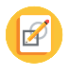
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Since the prediction task is to predict whether or not an employee will quit, the target variable is the churn column.

### Identify the types of models most appropriate for this task.

The most appropriate models for this predict task are classification models, more specifically a binary classification. For this task I want to implement two different models, a logisitc regression model and a ensemble model, in this case a Random Forest Classifier. I decided to choose these two models because Salifort Motors is looking for as much transparency on the reasons why an employee leaves. These two models can help explain and show exactly what features are most impactful to the models.

## Logistic Regression Model

### Modeling
Seperating target variable (y) from features (X) and splitting into training and testing data with a 75/25 split ratio.

In [50]:
X = df_final.drop('churned', axis=1)
y = df_final['churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [51]:
df_final['churned'].value_counts()

0    9285
1    1882
Name: churned, dtype: int64

Instantiating and fitting the model.

In [52]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\Junior\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Since there is a convergence warning on the model, lets try to normalize the data and see if we can fix this issue.**

### Normalizing The Data

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

In [54]:
X_scaled[:5]

array([[-1.05392566, -0.88846288, -0.12139287, -0.12094786,  1.61315159,
         1.02806447, -0.8768635 , -0.29320152],
       [-2.18338218,  1.47969883,  0.99066144, -0.12094786, -0.61990454,
        -0.97270164,  1.14042836, -0.29320152],
       [ 0.36835291,  0.47065602,  2.10271575, -0.12094786, -0.61990454,
         1.02806447, -0.8768635 , -0.29320152],
       [-1.09575739, -0.84727746, -0.12139287, -0.12094786,  1.61315159,
         1.02806447, -0.8768635 , -0.29320152],
       [-0.92843049, -0.97083372, -0.12139287, -0.12094786,  1.61315159,
         1.02806447, -0.8768635 , -0.29320152]])

Refitting the model with the scaled data

In [55]:
clf.fit(X_train, y_train)

LogisticRegression()

Scaling the data got rid of the warning. The algorithm seems to have converged.

In [56]:
clf.coef_

array([[-0.85432288,  1.59987829,  0.94219853, -0.14835828,  2.0922059 ,
         0.15814414, -0.0043698 , -0.28473386]])

In [57]:
clf.intercept_

array([-2.72792201])

These coefficients and intercept give us the ability to produce a mathematical model and show precisely what features affect the model and to what extent, or magnitude. This will be valuable for Salifort Motors to determine exactly which variables impact the tenure of an employee.

## Logistic Plots of All Features
Let’s plot every feature and take a look at how they relate to the target variable.

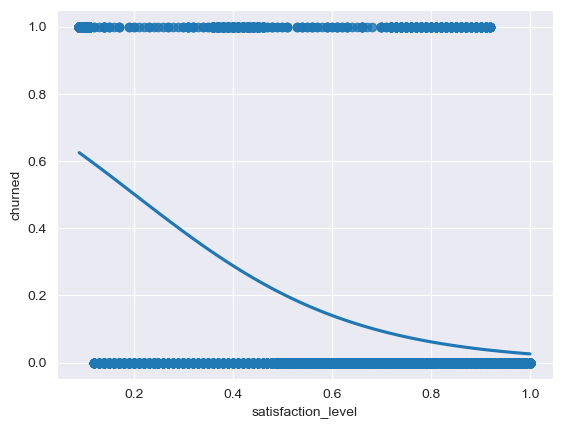

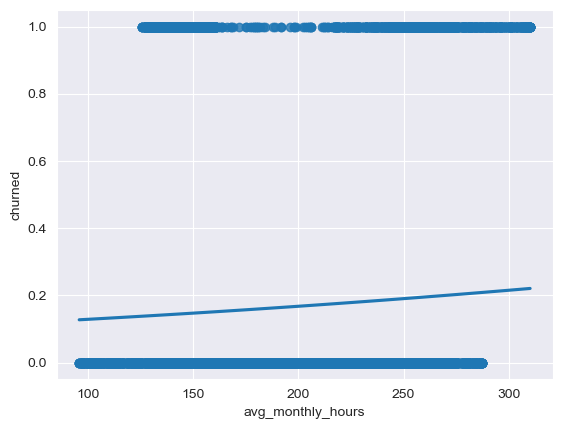

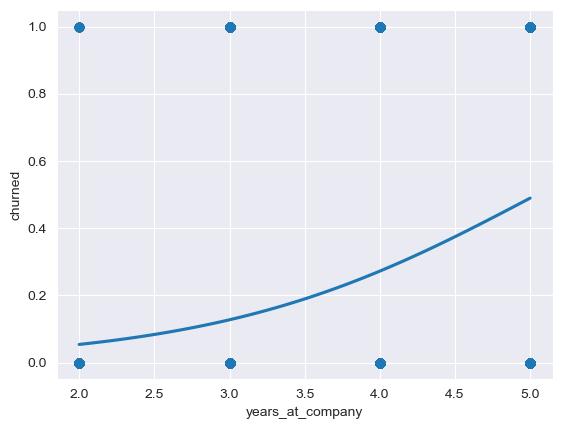

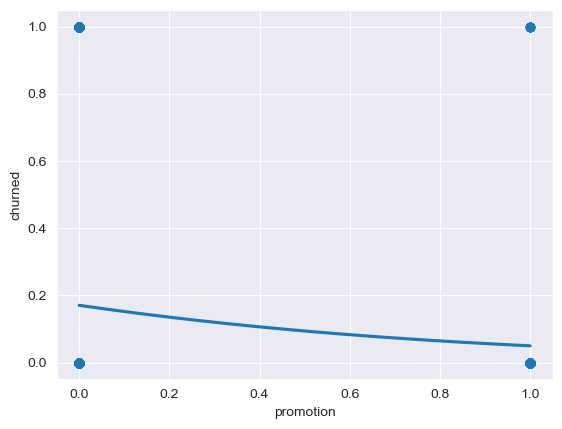

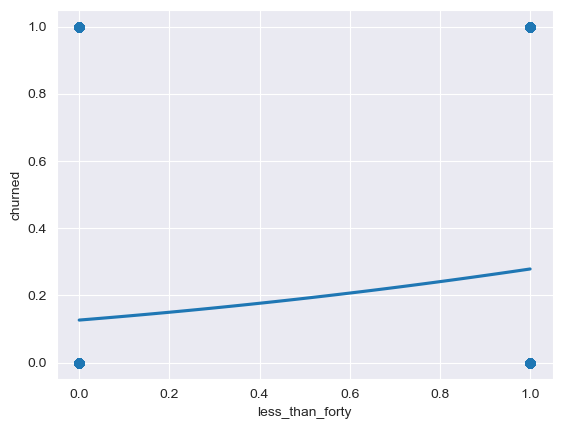

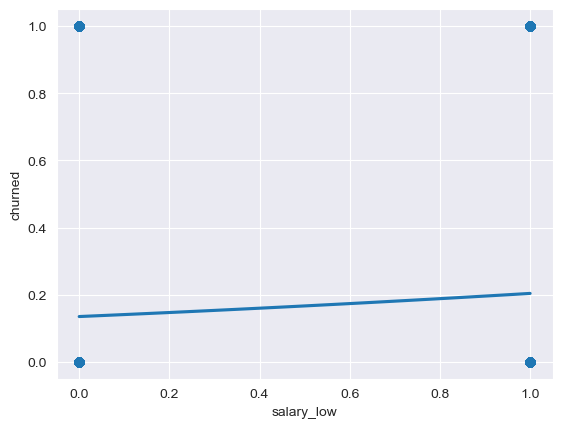

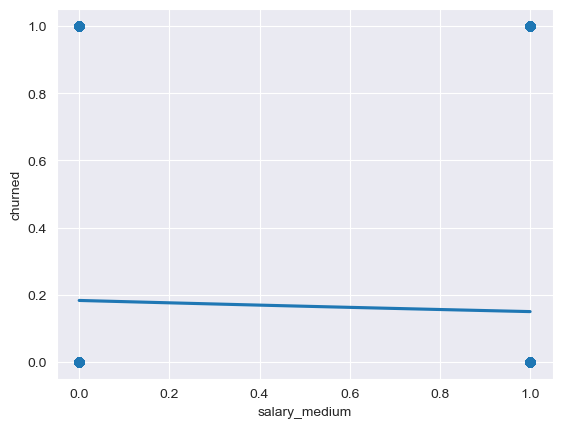

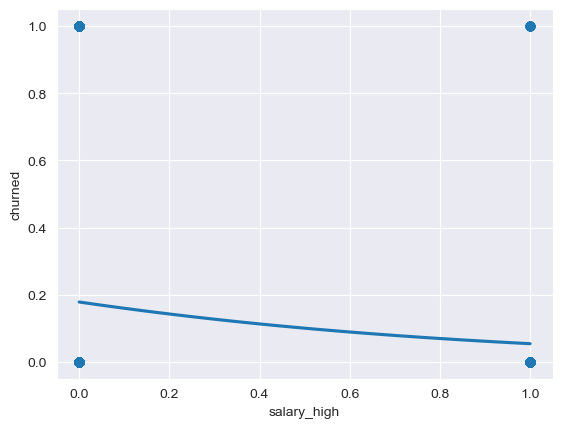

In [58]:
for var in df_final.columns[1:]:
    plt.figure(var)
    sns.regplot(data=df_final, x=var , y='churned', logistic=True, ci=None)

Taking a look at each of these plots we can gather an idea on which variables have effect on whether an employee leaves.

## Logistic Regression Model Prediction

In [59]:
y_pred = clf.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

## Analyze the results

### Testing results

In [60]:
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_pred))
print("Recall:", "%.6f" % recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred))

Accuracy: 0.853510
Precision: 0.575092
Recall: 0.348889
F1 Score: 0.434302


The accuracy of our Logistic Regression model turned out to be pretty great at 85% but the other metrics did not do so well with an f1 score of 43%. A quick search informed me that a high accuracy and a relatively low f1 score could be due to overfitteing or an underbalanced target variable. Since the target variable was underbalanced lets rebalance the dataset with upsampling to see if this can increase the performance of the model.

## Confusion Matrix For Logistic Regression

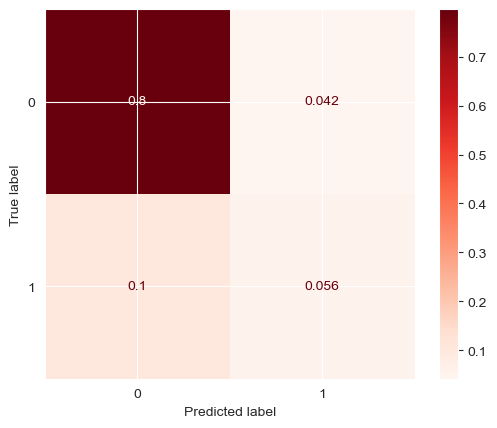

In [61]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Reds')

Examining the confusion matrix of errors, we can see how well the model performed with predictions:
* True Negatives = 2364, 80%
* True Positives = 513, 5%
* False Positives = 243, 4%
* False Negatives = 310, 10%

## Upsampled Logistic Regression Model
Because of the imbalance of the target variable lets try to rebalance the dataset using upsampling and see if we can improve the model, specifically the F1_score.

### Upsampling Data

In [62]:
df_final['churned'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: churned, dtype: float64

In [63]:
from sklearn.utils import resample

data_majority = df_final[df_final['churned'] == 0]
data_minority = df_final[df_final['churned'] == 1]

data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=0)
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

data_upsampled['churned'].value_counts()


0    9285
1    9285
Name: churned, dtype: int64

The target variable is now evenly balanced.

## Train Upsampled Logistic Regression

In [64]:
data_upsampled.head()

,churned,satisfaction_level,avg_monthly_hours,years_at_company,promotion,less_than_forty,salary_low,salary_medium,salary_high
0,0,0.58,215,3,0,0,1,0,0
1,0,0.82,202,3,0,0,1,0,0
2,0,0.45,193,3,0,0,1,0,0
3,0,0.78,247,3,0,0,1,0,0
4,0,0.49,214,2,0,0,1,0,0


In [65]:
X_upsampled = data_upsampled.drop('churned', axis=1)
y_upsampled = data_upsampled['churned']

X_upsampled_scaled = scaler.fit_transform(X_upsampled)
# reindex and bring column names back into scaled data
X_upsampled_scaled = pd.DataFrame(X_upsampled_scaled, index=X_upsampled.index, columns=X_upsampled.columns)

X_upsampled_train, X_upsampled_test, y_upsampled_train, y_upsampled_test = train_test_split(X_upsampled_scaled, y_upsampled, test_size=0.25, random_state=0)

clf.fit(X_upsampled_train, y_upsampled_train)

LogisticRegression()

## Evaluate Upsampled Logistic Regression

In [66]:
y_upsampled_pred = clf.predict(X_upsampled_test)

In [67]:
print("Upsampled Accuracy:", "%.6f" % accuracy_score(y_upsampled_test, y_upsampled_pred), "    Original Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Upsampled Precision:", "%.6f" % precision_score(y_upsampled_test, y_upsampled_pred), '   Original Precision:', '%.6f' % precision_score(y_test, y_pred))
print("Upsampled Recall:", "%.6f" % recall_score(y_upsampled_test, y_upsampled_pred), '      Original Recall:', '%.6f' % recall_score(y_test, y_pred))
print("Upsampled F1 Score:", "%.6f" % f1_score(y_upsampled_test, y_upsampled_pred), '    Original F1 Score:', '%.6f' % f1_score(y_test, y_pred))

Upsampled Accuracy: 0.872712     Original Accuracy: 0.853510
Upsampled Precision: 0.835212    Original Precision: 0.575092
Upsampled Recall: 0.927893       Original Recall: 0.348889
Upsampled F1 Score: 0.879116     Original F1 Score: 0.434302


Resampling the data proved to be very useful. The upsampled data increased all metrics including accuracy. The model accuracy increased from 85% to 87% a 2% increase, but the f1 score increased from 43% to 88% a 45% increase.

 ## Confusion Matrix For Upsampled Logistic Regression

Text(0.5, 1.0, 'Upsampled Data')

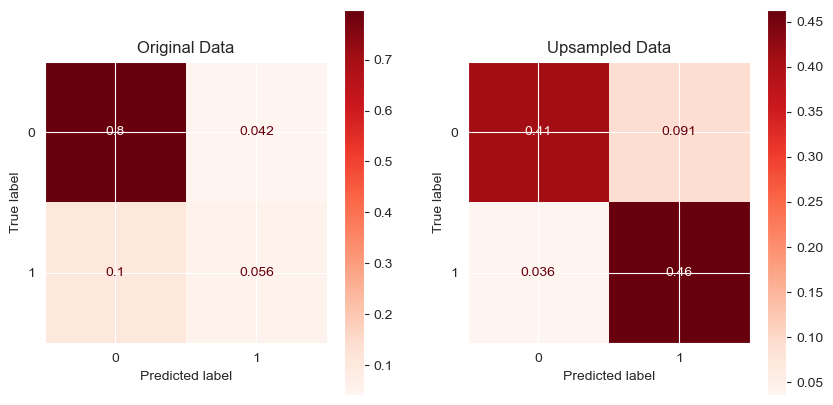

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_, normalize='all')
cm_upsampled = confusion_matrix(y_upsampled_test, y_upsampled_pred, labels=clf.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot(cmap='Reds', ax=ax[0])
disp_upsampled = ConfusionMatrixDisplay(confusion_matrix=cm_upsampled, display_labels=clf.classes_).plot(cmap='Reds', ax=ax[1])
ax[0].set_title('Original Data')
ax[1].set_title('Upsampled Data')

Examining the confusion matrix of errors on the upsampled data, we can see how the model performed with predictions:
* True Negatives = 2185, 41%
* True Positives = 2311, 46%
* False Positives = 689, 9%
* False Negatives = 529, 3%

## Conclusion: Logistic Regression

The upsampled Logistic Regression Model (tuned) performed very well with an accuracy of 87% and an F1 score of 88%. If Salifort Motors need the most transparent model, meaning a model that they can can deconstruct and understand relatively easily this model does a fair job. With this model Salifort has access to a mathematical formula that can be interpreted very clearly, with the information of the model coefficients and intercept. Next, I will be looking to increase all metrics with an ensemble model of Random Forests.

## Random Forest Model
This will be the second model with expectations to increase all metrics of the Logistic Regression model. A Random Forest model is not as transparent as the Logistic Regression model but more than enough to inform Salifort Motors of the reasons to why employee churn is so high.

In [69]:
df_final.head()

,churned,satisfaction_level,avg_monthly_hours,years_at_company,promotion,less_than_forty,salary_low,salary_medium,salary_high
0,1,0.38,157,3,0,1,1,0,0
2,1,0.11,272,4,0,0,0,1,0
3,1,0.72,223,5,0,0,1,0,0
4,1,0.37,159,3,0,1,1,0,0
5,1,0.41,153,3,0,1,1,0,0


### Split the Data
We’ll split the data into the features and a target variable. We’ll also split into training and testing data using the ‘train_test_split()’ function. The data will be split 75/25 ratio and the random_state will be set to 0 so the data can be replicated.

In [70]:
X = df_final.drop('churned', axis=1)
y = df_final['churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Modeling

In [71]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [9,10,None],
                         'min_samples_leaf': [1,2],
                         'min_samples_split': [4,5,6],
                         'max_features': [4,5,6],
                         'n_estimators': [100,110,125]
                         }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, refit='f1', cv=5, n_jobs=-1)

rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [9, 10, None], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [100, 110, 125]},
             refit='f1', scoring={'precision', 'accuracy', 'f1', 'recall'})

In [72]:
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [74]:
y_pred = rf_cv.predict(X_test)

print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_pred))
print("Recall:", "%.6f" % recall_score(y_test, y_pred))
print("F1:", "%.6f" % f1_score(y_test, y_pred))

Accuracy: 0.972779
Precision: 0.938967
Recall: 0.888889
F1: 0.913242


The Random Forest model proved to outperform the Logistic model by 10%. With an accuracy or 97% and an F1 score of 91% this Random Forest model proved to be the better model. Let's take a look at the Random Forest model with the upsampled data and see if we can improve the model even more.

### Random Forest with Upsampled Data

In [75]:
rf_cv.fit(X_upsampled_train,y_upsampled_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [9, 10, None], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [100, 110, 125]},
             refit='f1', scoring={'precision', 'accuracy', 'f1', 'recall'})

In [76]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [77]:
y_pred = rf_cv.predict(X_upsampled_test)

print("Upsampled Accuracy:", "%.6f" % accuracy_score(y_upsampled_test, y_pred))
print("Upsampled Precision:", "%.6f" % precision_score(y_upsampled_test, y_pred))
print("Upsampled Recall:", "%.6f" % recall_score(y_upsampled_test, y_pred))
print("Upsampled F1:", "%.6f" % f1_score(y_upsampled_test, y_pred))

Upsampled Accuracy: 0.985354
Upsampled Precision: 0.977080
Upsampled Recall: 0.993955
Upsampled F1: 0.985445


Using the upsampled data the Random Forest model was slightly increased in performance. with now a 98.5% accuracy and a 98.5% F1 score.

## Tuned Random Forest Model
There is not much better this model can do but let’s see if we can tune the model using a validation data set and a custom split. We can also take a look at this tuned model using the upsampled data as well to see how that performs.

### Split Data and Create Validation Set

In [78]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [79]:
from sklearn.model_selection import PredefinedSplit
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [80]:
rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs=-1, verbose= 1)

### Train

In [81]:
%%time
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 162 candidates, totalling 162 fits
Wall time: 9.76 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [9, 10, None], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [100, 110, 125]},
             refit='f1', verbose=1)

In [82]:
rf_val.best_params_

{'max_depth': 9,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [83]:
rf_opt = RandomForestClassifier(max_depth=9, max_features= 4, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)

In [84]:
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=4, min_samples_split=5)

## Evaluate

In [87]:
y_pred = rf_opt.predict(X_test)

In [88]:
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_pred))
print("Recall:", "%.6f" % recall_score(y_test, y_pred))
print("F1:", "%.6f" % f1_score(y_test, y_pred))

Accuracy: 0.972421
Precision: 0.938824
Recall: 0.886667
F1: 0.912000


The Tuned Random Forest performed about the same as the base RF model without upsampling, but worse than the upsampled Random Forest. Now lets see if the upsampled data has any positive affects.

## Tuned Random Forest Model with Upsampling

In [89]:
X_tr, X_val, y_tr, y_val = train_test_split(X_upsampled_train, y_upsampled_train, test_size=0.25, random_state=0)

In [90]:
split_index = [0 if x in X_val.index else -1 for x in X_upsampled_train.index]
custom_split = PredefinedSplit(split_index)

In [91]:
rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs=-1, verbose= 1)

In [92]:
%%time
rf_val.fit(X_upsampled_train, y_upsampled_train)

Fitting 1 folds for each of 162 candidates, totalling 162 fits
Wall time: 15.7 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [9, 10, None], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [100, 110, 125]},
             refit='f1', verbose=1)

In [93]:
rf_val.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [94]:
y_pred = rf_val.predict(X_upsampled_test)

print("Upsampled Accuracy:", "%.6f" % accuracy_score(y_upsampled_test, y_pred))
print("Upsampled Precision:", "%.6f" % precision_score(y_upsampled_test, y_pred))
print("Upsampled Recall:", "%.6f" % recall_score(y_upsampled_test, y_pred))
print("Upsampled F1:", "%.6f" % f1_score(y_upsampled_test, y_pred))

Upsampled Accuracy: 0.986216
Upsampled Precision: 0.979149
Upsampled Recall: 0.993523
Upsampled F1: 0.986284


The Tuned Random Forest using the upsampled data has outperformed the base Random Forest model that also used the upsampled data and every other model. This is the best performing model by far and the most accurate. With an accuracy of 98.6% and an F1 score of 98.6%.
If Salifort Motors is looking for the most accurate prediction model this is definitely the one to implement. My vote would be to use this model as every metric is close to a perfect model.

# Comparision of All Models Tested

In [100]:
table = pd.DataFrame()

table = table.append({'Model': "Logistic Regression",
                      'Accuracy':  0.853510,
                      'Precision': 0.575092,
                      'Recall': 0.348889,
                      'F1': 0.434302
                      },
                     ignore_index=True
                     )
table = table.append({'Model': "Upsampled Logistic Regression",
                      'Accuracy':   0.872712,
                      'Precision':  0.835212,
                      'Recall':  0.927893,
                      'F1': 0.879116
                      },
                     ignore_index=True
                     )
table = table.append({'Model': "Random Forest",
                      'Accuracy':  0.972779,
                      'Precision': 0.938967,
                      'Recall': 0.888888,
                      'F1': 0.913242
                      },
                     ignore_index=True
                     )
table = table.append({'Model': "Upsampled Random Forest",
                      'Accuracy':  0.985354,
                      'Precision': 0.977079,
                      'Recall': 0.993955,
                      'F1': 0.985445
                      },
                     ignore_index=True
                     )
table = table.append({'Model': "Tuned Random Forest",
                      'Accuracy':  0.972421,
                      'Precision': 0.938824,
                      'Recall': 0.886667,
                      'F1': 0.912000
                      },
                     ignore_index=True
                     )
table = table.append({'Model': "Upsampled Tuned Random Forest",
                      'Accuracy':  0.986215,
                      'Precision': 0.979148,
                      'Recall': 0.993523,
                      'F1': 0.986283
                      },
                     ignore_index=True
                     )
table

C:\Users\Junior\AppData\Local\Temp\ipykernel_16724\3150161851.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': "Logistic Regression",
C:\Users\Junior\AppData\Local\Temp\ipykernel_16724\3150161851.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': "Upsampled Logistic Regression",
C:\Users\Junior\AppData\Local\Temp\ipykernel_16724\3150161851.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': "Random Forest",
C:\Users\Junior\AppData\Local\Temp\ipykernel_16724\3150161851.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.appen

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.853510,0.575092,0.348889,0.434302
1,Upsampled Logistic Regression,0.872712,0.835212,0.927893,0.879116
2,Random Forest,0.972779,0.938967,0.888888,0.913242
3,Upsampled Random Forest,0.985354,0.977079,0.993955,0.985445
4,Tuned Random Forest,0.972421,0.938824,0.886667,0.912000
5,Upsampled Tuned Random Forest,0.986215,0.979148,0.993523,0.986283


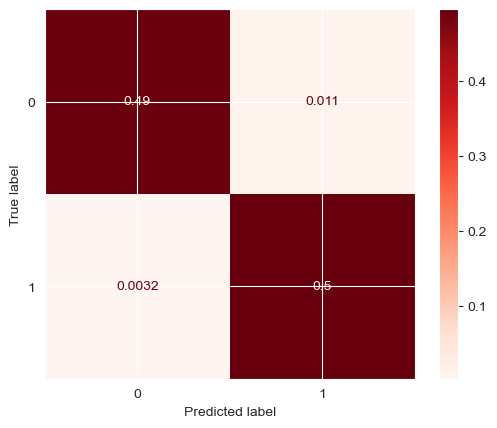

In [102]:
cm = confusion_matrix(y_upsampled_test, y_pred, labels=clf.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Reds')

Taking a quicklook at a confusion_matrix of the best performing Random Forest Model we can see how well the model predicted true positives and true negatives.

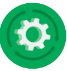
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- What business recommendations do you propose based on the models built?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results
#### Logistic Regression

#### Random Forest

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]